# Week 6: Decision Trees and Random Forests

This notebook explores Decision Tree and Random Forest classifiers on multiple cybersecurity datasets. The goal is to evaluate classification performance using metrics such as accuracy, macro F1-score, and confusion matrices.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Load the Datasets

In [2]:
beth_df = pd.read_csv('datasets/beth.csv')
unsw_df = pd.read_csv('datasets/unsw.csv')
attacks_df = pd.read_csv('datasets/cyber.csv')

## Prepare Features and Targets

In [3]:
# Define exactly which columns to drop as “targets”
drop_beth     = ["target"]
drop_unsw     = ["target_multiclass", "attack_cat", "target_binary", "label"]
drop_attacks  = ["target_multiclass", "target_binary"]

# Define X and y
X_beth    = beth_df.drop(columns=drop_beth)
y_beth    = beth_df["target"]

X_unsw    = unsw_df.drop(columns=drop_unsw).select_dtypes(include=[np.number])
y_unsw    = unsw_df["target_binary"]

X_attacks = attacks_df.drop(columns=drop_attacks).select_dtypes(include=[np.number])
y_attacks = attacks_df["target_binary"]

# Train Test Split

# BETH
X_beth_train, X_beth_test, y_beth_train, y_beth_test = train_test_split(
    X_beth, y_beth, test_size=0.2, stratify=y_beth, random_state=42
)

# UNSW 
X_unsw_train, X_unsw_test, y_unsw_train, y_unsw_test = train_test_split(
    X_unsw, y_unsw, test_size=0.2, stratify=y_unsw, random_state=42
)

# Attacks
X_attacks_train, X_attacks_test, y_attacks_train, y_attacks_test = train_test_split(
    X_attacks, y_attacks, test_size=0.2, stratify=y_attacks, random_state=42
)

# Feature Scaling

# BETH
scaler_beth = StandardScaler()
X_beth_train_scaled = scaler_beth.fit_transform(X_beth_train)
X_beth_test_scaled  = scaler_beth.transform(X_beth_test)

# UNSW 
scaler_unsw = StandardScaler()
X_unsw_train_scaled = scaler_unsw.fit_transform(X_unsw_train)
X_unsw_test_scaled  = scaler_unsw.transform(X_unsw_test)

# Attacks
scaler_attacks = StandardScaler()
X_attacks_train_scaled = scaler_attacks.fit_transform(X_attacks_train)
X_attacks_test_scaled  = scaler_attacks.transform(X_attacks_test)

datasets = {
    "BETH":    (X_beth_train_scaled,    y_beth_train,    X_beth_test_scaled,    y_beth_test),
    "UNSW":    (X_unsw_train_scaled,    y_unsw_train,    X_unsw_test_scaled,    y_unsw_test),
    "Attacks": (X_attacks_train_scaled, y_attacks_train, X_attacks_test_scaled, y_attacks_test)
}

## BETH Dataset: Decision Tree

In [4]:
# Decision Tree
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_beth_train, y_beth_train)
y_pred = dtree.predict(X_beth_test)
print('Accuracy:', accuracy_score(y_beth_test, y_pred))
print(classification_report(y_beth_test, y_pred))

Accuracy: 0.9669909603145649
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    436923
           1       0.82      0.90      0.86     54456
           2       1.00      1.00      1.00      2001

    accuracy                           0.97    493380
   macro avg       0.94      0.96      0.95    493380
weighted avg       0.97      0.97      0.97    493380



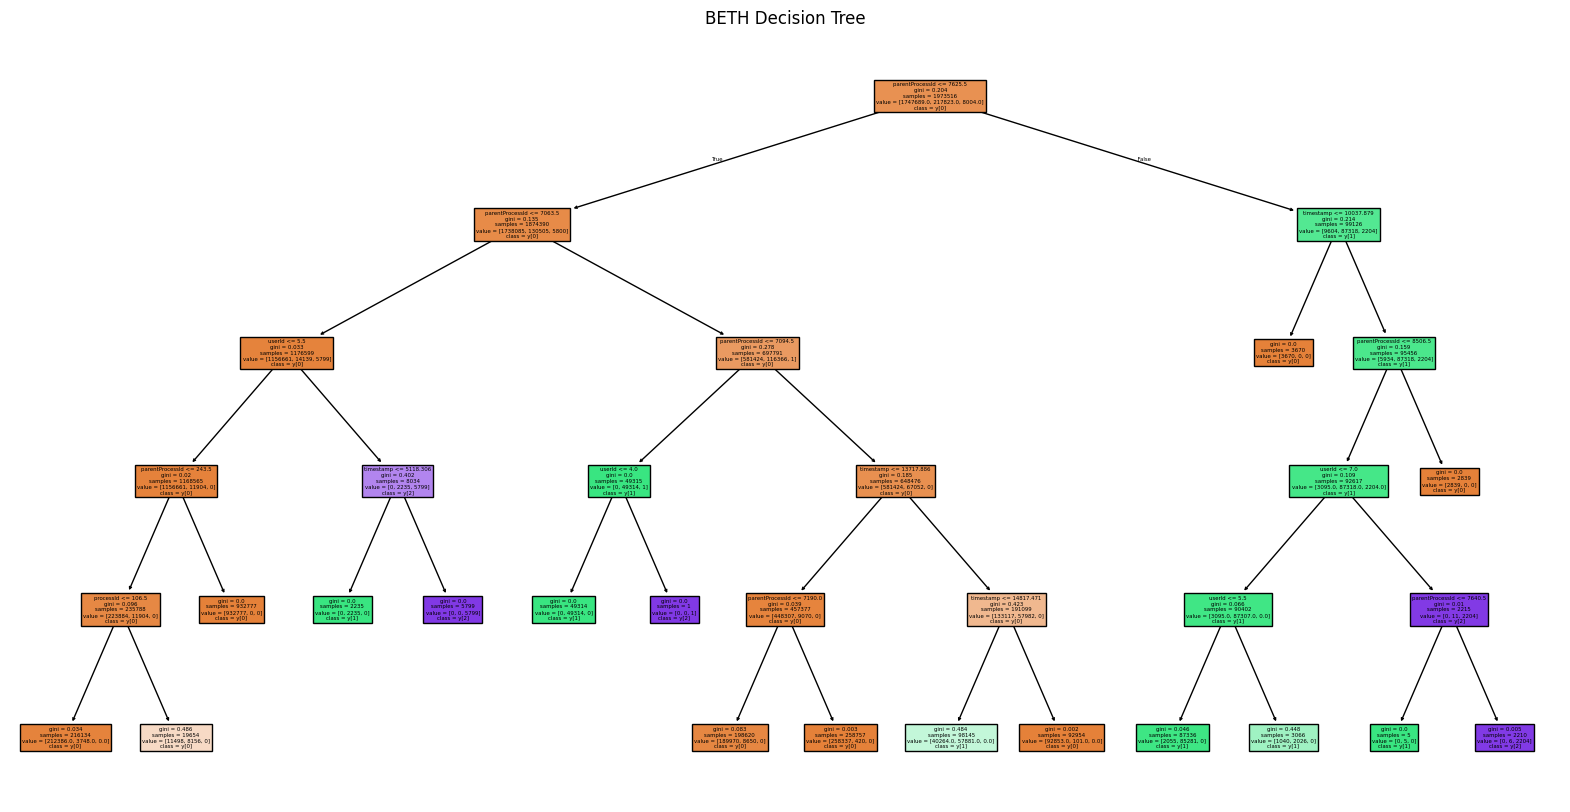

In [5]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=list(X_beth.columns), class_names=True)
plt.title('BETH Decision Tree')
plt.show()

## BETH Dataset: Random Forest and Feature Importance

In [6]:
# Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_beth_train, y_beth_train)
y_pred_rf = forest.predict(X_beth_test)
print('Random Forest Accuracy:', accuracy_score(y_beth_test, y_pred_rf))
print(classification_report(y_beth_test, y_pred_rf))

Random Forest Accuracy: 0.9998743362114395
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    436923
           1       1.00      1.00      1.00     54456
           2       1.00      1.00      1.00      2001

    accuracy                           1.00    493380
   macro avg       1.00      1.00      1.00    493380
weighted avg       1.00      1.00      1.00    493380



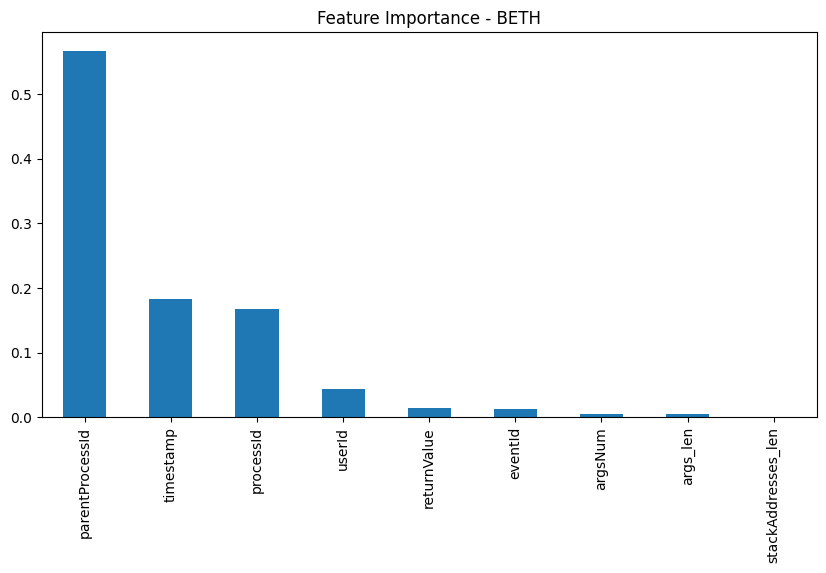

In [7]:
# Feature Importance
importances = forest.feature_importances_
feat_importance = pd.Series(importances, index=X_beth.columns).sort_values(ascending=False)
feat_importance.plot(kind='bar', figsize=(10,5), title='Feature Importance - BETH')
plt.show()

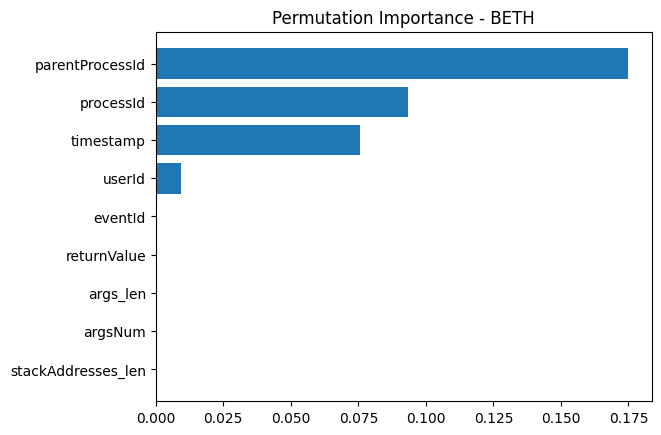

In [8]:
# Permutation Importance (Feature Randomization)
perm_importance = permutation_importance(forest, X_beth_test, y_beth_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X_beth.columns)[sorted_idx])
plt.title('Permutation Importance - BETH')
plt.gca().invert_yaxis()
plt.show()

## UNSW Dataset: Decision Tree

In [9]:
# Train/Test Split
X_unsw_train, X_unsw_test, y_unsw_train, y_unsw_test = train_test_split(X_unsw, y_unsw, test_size=0.3, random_state=42)

In [10]:
# Decision Tree
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_unsw_train, y_unsw_train)
y_pred = dtree.predict(X_unsw_test)
print('Accuracy:', accuracy_score(y_unsw_test, y_pred))
print(classification_report(y_unsw_test, y_pred))

Accuracy: 0.9268453597578329
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     28026
           1       0.95      0.93      0.94     49276

    accuracy                           0.93     77302
   macro avg       0.92      0.93      0.92     77302
weighted avg       0.93      0.93      0.93     77302



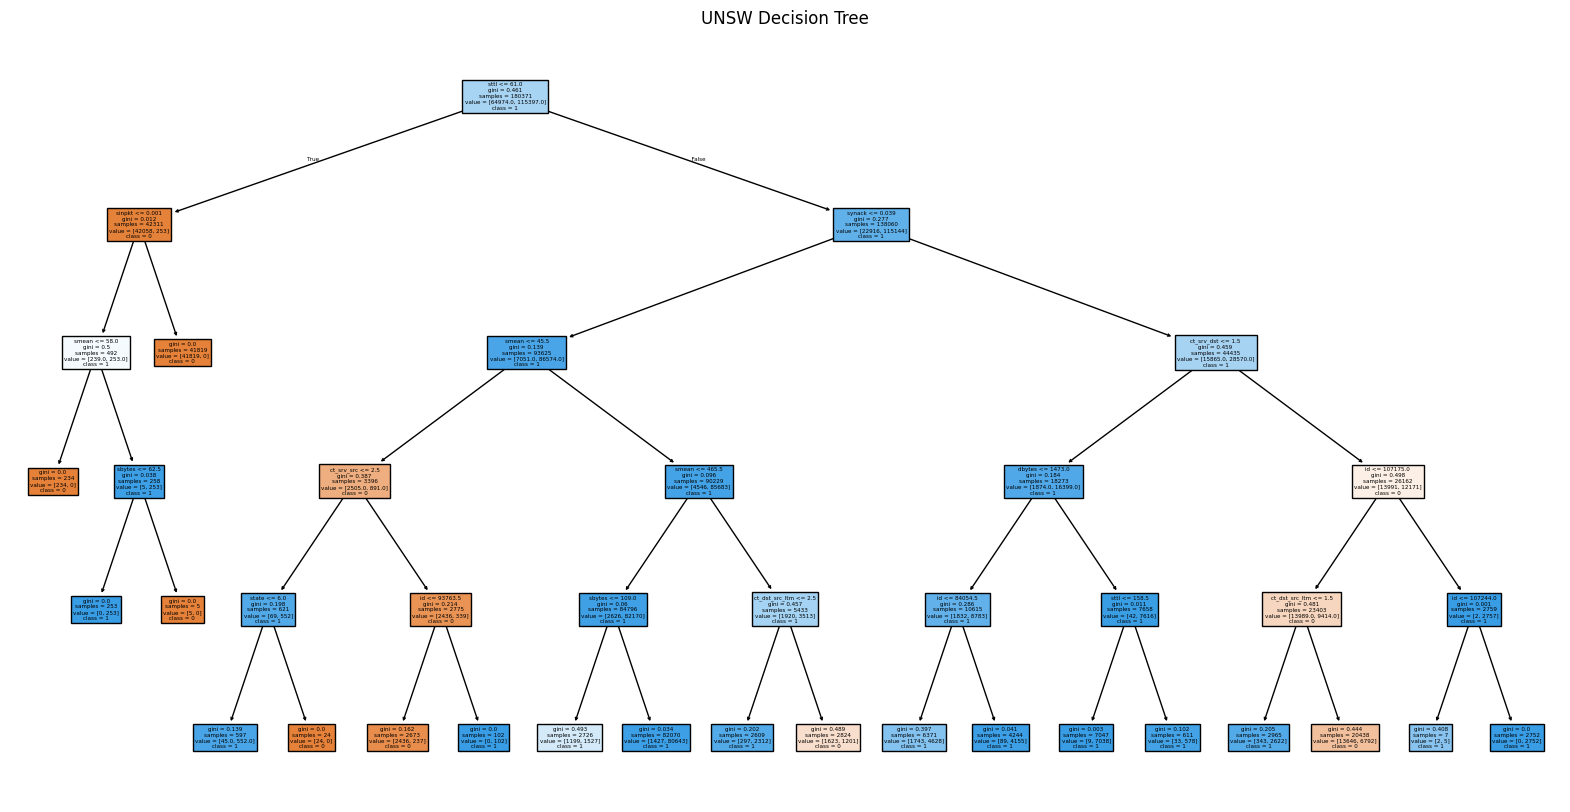

In [11]:
# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dtree,
    filled=True,
    feature_names=list(X_unsw.columns),
    class_names=[str(cls) for cls in dtree.classes_]
)
plt.title('UNSW Decision Tree')
plt.show()

## UNSW Dataset: Random Forest and Feature Importance

In [12]:
# Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_unsw_train, y_unsw_train)
y_pred_rf = forest.predict(X_unsw_test)

print('Random Forest Accuracy:', accuracy_score(y_unsw_test, y_pred_rf))
print(classification_report(y_unsw_test, y_pred_rf))

Random Forest Accuracy: 0.9836614835321208
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     28026
           1       0.99      0.99      0.99     49276

    accuracy                           0.98     77302
   macro avg       0.98      0.98      0.98     77302
weighted avg       0.98      0.98      0.98     77302



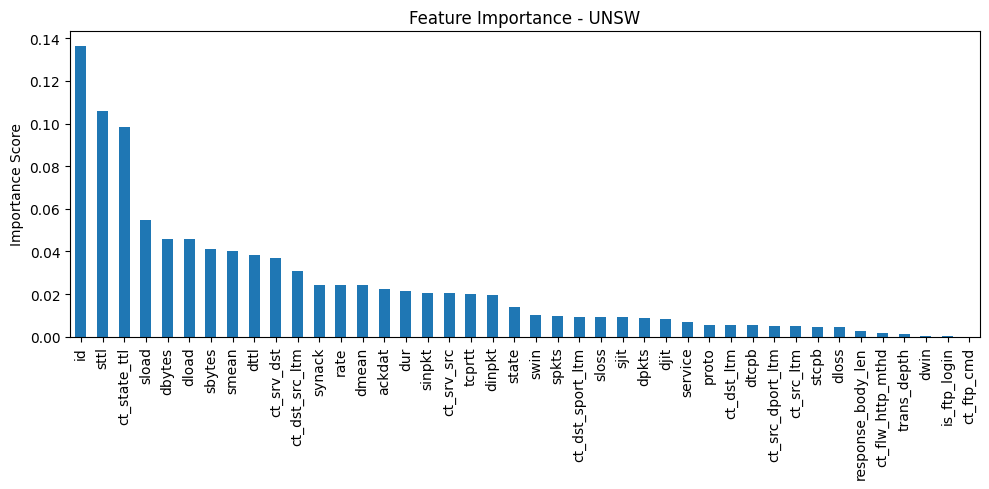

In [13]:
# Feature Importance
importances = forest.feature_importances_
feat_importance = pd.Series(importances, index=X_unsw.columns).sort_values(ascending=False)
feat_importance.plot(kind='bar', figsize=(10, 5), title='Feature Importance - UNSW')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

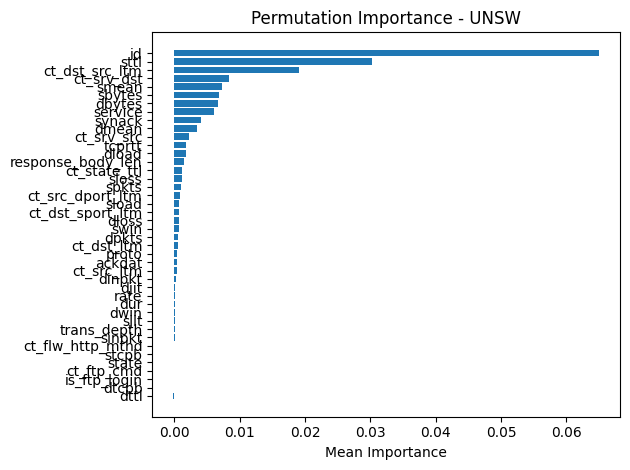

In [14]:
# Permutation Importance (Feature Randomization)
perm_importance = permutation_importance(forest, X_unsw_test, y_unsw_test, n_repeats=10, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X_unsw.columns)[sorted_idx])
plt.title('Permutation Importance - UNSW')
plt.gca().invert_yaxis()
plt.xlabel('Mean Importance')
plt.tight_layout()
plt.show()

## ATTACKS Dataset: Decision Tree

In [15]:
# Train/Test Split
X_attacks_train, X_attacks_test, y_attacks_train, y_attacks_test = train_test_split(X_attacks, y_attacks, test_size=0.3, random_state=42)

In [16]:
# Decision Tree
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_attacks_train, y_attacks_train)
y_pred = dtree.predict(X_attacks_test)
print('Accuracy:', accuracy_score(y_attacks_test, y_pred))
print(classification_report(y_attacks_test, y_pred))

Accuracy: 0.7783333333333333
              precision    recall  f1-score   support

           0       0.21      0.00      0.00      2646
           1       0.78      1.00      0.88      9354

    accuracy                           0.78     12000
   macro avg       0.49      0.50      0.44     12000
weighted avg       0.65      0.78      0.68     12000



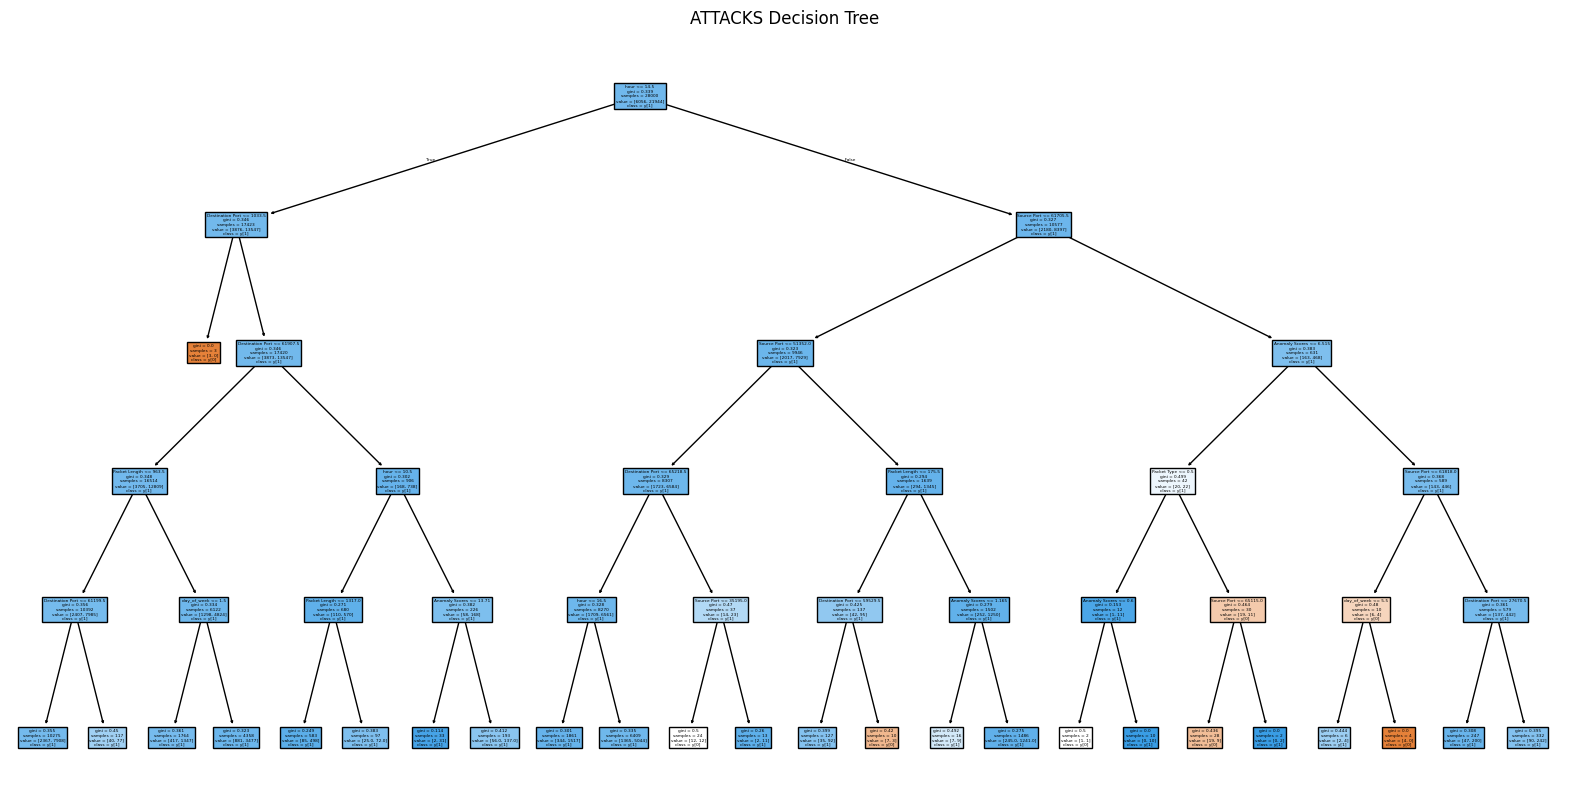

In [17]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=list(X_attacks.columns), class_names=True)
plt.title('ATTACKS Decision Tree')
plt.show()

## ATTACKS Dataset: Random Forest and Feature Importance

In [18]:
# Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_attacks_train, y_attacks_train)
y_pred_rf = forest.predict(X_attacks_test)
print('Random Forest Accuracy:', accuracy_score(y_attacks_test, y_pred_rf))
print(classification_report(y_attacks_test, y_pred_rf))

Random Forest Accuracy: 0.7789166666666667
              precision    recall  f1-score   support

           0       0.33      0.00      0.01      2646
           1       0.78      1.00      0.88      9354

    accuracy                           0.78     12000
   macro avg       0.56      0.50      0.44     12000
weighted avg       0.68      0.78      0.68     12000



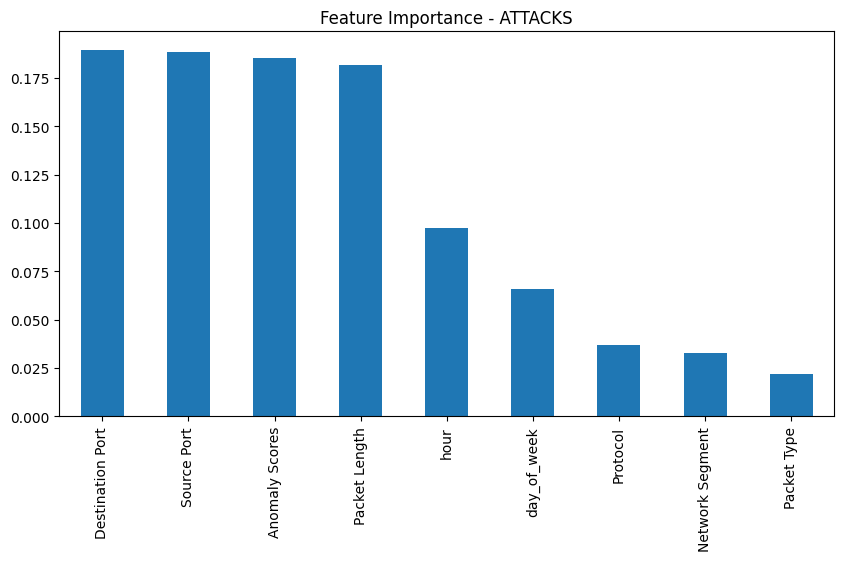

In [19]:
# Feature Importance
importances = forest.feature_importances_
feat_importance = pd.Series(importances, index=X_attacks.columns).sort_values(ascending=False)
feat_importance.plot(kind='bar', figsize=(10,5), title='Feature Importance - ATTACKS')
plt.show()

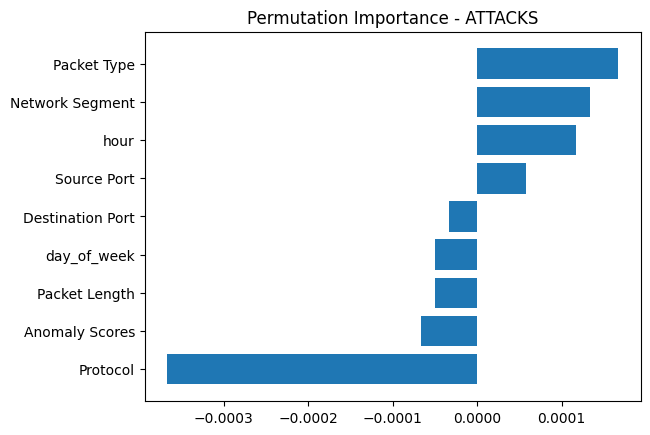

In [20]:
# Permutation Importance (Feature Randomization)
perm_importance = permutation_importance(forest, X_attacks_test, y_attacks_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X_attacks.columns)[sorted_idx])
plt.title('Permutation Importance - ATTACKS')
plt.gca().invert_yaxis()
plt.show()

## Key Takeaways

| Dataset  | Model          | Accuracy | Macro F1 | Notes                                                                 |
|----------|----------------|----------|----------|-----------------------------------------------------------------------|
| BETH     | Decision Tree  | 0.967    | 0.95     | Strong performance overall, but slight drop in F1 for class 1         |
| BETH     | Random Forest  | 0.9999   | 1.00     | Near-perfect performance across all classes                           |
| UNSW     | Decision Tree  | 0.927    | 0.92     | High accuracy, solid precision and recall for both classes            |
| UNSW     | Random Forest  | 0.984    | 0.98     | Excellent generalization, outperforming the decision tree             |
| Attacks  | Decision Tree  | 0.778    | 0.44     | Poor performance on minority class (class 0), strong class imbalance  |
| Attacks  | Random Forest  | 0.779    | 0.44     | Still struggled with minority class, but slightly more robust         |

- **Random Forests consistently outperformed decision trees**, especially on imbalanced datasets.
- The **BETH dataset** showed exceptional results with Random Forests—virtually perfect precision and recall.
- The **UNSW dataset** benefited substantially from the ensemble approach, maintaining high accuracy and balanced performance.
- The **Cybersecurity Attacks dataset** revealed the **challenges of imbalanced data**, as both models failed to accurately predict minority classes despite strong overall accuracy.
- **Feature importances** from both impurity-based and permutation methods highlighted key predictors unique to each dataset.
- Random Forests should be considered a strong baseline for real-world classification tasks in cybersecurity, though attention must still be paid to class imbalance and evaluation metrics beyond accuracy.

## Yellowdig Contribution

https://yellowdig.app/n/bu-omds/community/680847e5-a19a-76a7-5e0e-1a1c8b27a7a3?postId=684f8745-b106-4152-b3ee-d85cb921437a